#### 스택 : 선입후출 / 후입선출

In [3]:
# 스택 예제

stack = []

stack.append(5)
stack.append(6)
stack.append(7)
stack.pop()
stack.append(1)
stack.append(2)
stack.pop()

print(stack)
print(stack[::-1])

[5, 6, 1]
[1, 6, 5]


#### 큐 : 선입선출(놀이공원 입장할 때, 먼저 온 사람이 먼저 들어가고 나중에 온 사람일수록 나중에 들어간다)

In [4]:
# 큐 예제
from collections import deque

queue = deque()

queue.append(5)
queue.append(2)
queue.append(3)
queue.popleft()
queue.append(1)
queue.append(4)
queue.popleft()

print(queue)

deque([3, 1, 4])


In [5]:
queue.reverse() # 다음 출력을 위해 역순으로 바꾸기
print(queue)

deque([4, 1, 3])


#### 재귀 함수 : 자기 자신을 다시 호출하는 함수

In [6]:
def recursive_function():
    print("재귀 함수를 호출합니다.")
    recursive_function()

In [ ]:
def recursive_function(i):
    # 100번째 출력했을 때 종료되도록 종료 조건 명시
    if i == 100:
        return

In [ ]:
# 재귀 함수를 이용하는 대표적인 예제 : 팩토리얼 문제

# 1) 반복적으로 구현한 n!
def factorial_iterative(n):
    result = 1
    # 1부터 n까지의 수를 차례대로 곱하기
    for i in range(1,n+1):
        result *= i
    return result

# 2) 재귀적으로 표현한 n!
def factorial_recursive(n):
    if n <= 1:
        return 1
    
    # n! = n * (n-1)! 를 그대로 코드로 작성하기
    # n이 1보다 클 때 : factorial(n) = n * factorial(n-1) 수학적 점화식 표현 이용
    return n * factorial_recursive(n-1)

# 탐색 알고리즘

## 1) DFS(Depth-First Search), 깊이 우선 탐색이라고도 부르며, 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘
#### 스택 자료구조에 기초한다는 점에서 구현이 간단
#### 스택을 이용하는 알고리즘이기 때문에 실제 구현은 재귀 함수를 이용했을 때 매우 간결하게 구현할 수 있다

In [7]:
# 인접 행렬 방식
INF = 999999999999

# 2차원 리스트를 이용해 인접 행렬 표현
graph = [
    [0,7,5],
    [7,0,INF],
    [5,INF,0]
]

print(graph)

[[0, 7, 5], [7, 0, 999999999999], [5, 999999999999, 0]]


In [8]:
# 인접 리스트 방식
# 단순히 2차원 리스트를 이용하면 된다는 점만 기억하자
# 행이 3개인 2차원 리스트로 인접 리스트 표현
graph = [[] for _ in range(3)]

# 노드 0에 연결된 노드 정보 저장(노드,거리)
graph[0].append((1,7))
graph[0].append((2,5))

# 노드 1에 연결된 노드 정보 저장(노드,거리)
graph[1].append((0,7))

# 노드 2에 연결된 노드 정보 저장(노드,거리)
graph[2].append((0,5))

print(graph)


[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]


In [9]:
# DFS 예제
def dfs(graph,v,visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v,end=' ')

    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph,i,visited)

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원)
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문한 정보를 리스트 자료형으로 표현(1차원)
visitied = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph,1,visitied)

1 2 7 6 8 3 4 5 

In [11]:
# 다른 예제
def dfs(graph,start_node):
    to_visit,visitied = list(),list()
    to_visit.append(start_node)

    while to_visit:
        node = to_visit.pop()

        if node not in visitied:
            visitied.append(node)
            to_visit.extend(graph[node])

    return visitied

graph = {
    'A' : ['C','B'],
    'B' : ['E','D'],
    'C' : ['G','F'],
    'D' : [],
    'E' : [],
    'F' : [],
    'G' : []
}

print(dfs(graph,'A'))

['A', 'B', 'D', 'E', 'C', 'F', 'G']


## 2) BFS(Breadth First Search), 너비 우선 탐색, 가까운 노드부터 탐색하는 알고리즘

#### 큐 자료구조에 기초한다는 점에서 구현이 간단하다
#### deque 라이브러리를 사용하는 것이 좋다

In [12]:
# BFS 예제
from collections import deque

def bfs(graph,start,visitied):
    # 큐 구현을 위해 deque 라이브러리 사용
    queue = deque([start])

    # 현재 노드를 방문 처리
    visitied[start] = True

    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 하나의 원소를 뽑아 출력
        v = queue.popleft()
        print(v,end=' ')

        # 해당 원소와 연결된, 아직 방문하지 않은 원소들을 큐에 삽입
        for i in graph[v]:
            if not visitied[i]:
                queue.append(i)
                visitied[i] = True

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원)
graph = [
    [],
    [2,3,8],
    [1,7],
    [1,4,5],
    [3,5],
    [3,4],
    [7],
    [2,6,8],
    [1,7]
]

# 각 노드가 방문한 정보를 리스트 자료형으로 표현(1차원)
visitied = [False] * 9

# 정의된 DFS 함수 호출
bfs(graph,1,visitied)

1 2 3 8 7 4 5 6 

In [13]:
# 다른 예제
from collections import deque

def bfs(graph,start_node):
    to_visit,visitied = deque(),[]
    to_visit.append(start_node)

    while to_visit:
        node = to_visit.popleft()

        if node not in visitied:
            visitied.append(node)
            to_visit.extend(graph[node])

    return visitied

graph = {
    'A' : ['C','B'],
    'B' : ['E','D'],
    'C' : ['G','F'],
    'D' : [],
    'E' : [],
    'F' : [],
    'G' : []
}

print(bfs(graph,'A'))

['A', 'C', 'B', 'G', 'F', 'E', 'D']


### 예제 1) 음료수 얼려 먹기

#### 1. 특정한 지점의 주변 상,하,좌,우를 살펴본 뒤에 주변 지점 중에서 값이 0이면서 아직 방문하지 않은 지점이 있다면 해당 지점을 방문
#### 2. 방문한 지점에서 다시 상,하,좌,우 살펴보면서 방문을 다시 진행

In [16]:
# N,M을 공백으로 구분하여 입력받기
n,m = map(int,input().split())

# 2차원 리스트의 맵 정보 입력받기
graph = []
for i in range(n):
    graph.append(list(map(int,input())))

# DFS로 특정한 노드를 방문한 뒤에 연결된 모든 노드들도 방문
def dfs(x,y):

    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    
    # 현재 노드를 아직 방문하지 않았다면
    if graph[x][y] == 0:
        # 해당 노드 방문 처리
        graph[x][y] = 1

        # 상,하,좌,우의 위치도 모두 재귀적으로 호출: (1,1)을 기준으로
        dfs(x-1,y) # 좌
        dfs(x,y-1) # 하
        dfs(x+1,y) # 우
        dfs(x,y+1) # 상
        return True
    
    return False

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):

        # 현재 위치에서 DFS 수행
        if dfs(i,j) == True:
            result += 1

# 정답 출력
print(result)

ValueError: invalid literal for int() with base 10: ' '

### 과제 1) DFS와 BFS - 백준 1260

In [22]:
from collections import deque

# 정점(노드 수), 간선수, 시작점을 입력받음
n,m,v = map(int,input().split())

# 초기값을 False로 만들어 그래프 선언
graph = [[False] * (n+1) for _ in range(n+1)]

# 연결된 정점을 입력
for i in range(m):
    x,y = map(int,input().split())
    graph[x][y] = 1
    graph[y][x] = 1

# dfs와 bfs 그래프의 방문 여부를 담을 리스트
visitied1 = [False] * (n+1)
visitied2 = [False] * (n+1)

# dfs
def dfs(v):
    # 방문처리
    visitied1[v] = True
    # 방문 후, 정점 출력
    print(v,end=' ')
    # 방문 기록이 없고, 인덱스에 값이 있다면(연결되어있다면)
    for i in range(1,n+1):
        if not visitied1[i] and graph[v][i] == 1:
            dfs(i)

# bfs
def bfs(v):
    # 방문할 곳을 순서대로 넣을 큐
    q = deque([v])
    visitied2[v] = True
    # 큐 안에 데이터가 없을 때 까지 실행
    while q:
        v = q.popleft()
        print(v,end=' ')

        for i in range(1,n+1):
            if not visitied2[i] and graph[v][i] == 1:
                q.append(i)
                visitied2[i] = True

dfs(v)
print()
bfs(v)

1 2 4 3 
1 2 3 4 

In [3]:
from collections import deque

# 정점(노드 수), 간선수, 시작점을 입력받음
n,m,v = map(int,input().split())

# 초기값을 False로 만들어 그래프 선언
graph = [[False] * (n+1) for _ in range(n+1)]
print(graph)

# 연결된 정점을 입력
for i in range(m):
    x,y = map(int,input().split()) # 1 2 / 1 3
    graph[x][y] = 1 # graph[1][2]
    graph[y][x] = 1 # graph[2][1]
    print(graph)

[[False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False], [False, False, False, False, False]]
[[False, False, False, False, False], [False, False, 1, False, False], [False, 1, False, False, False], [False, False, False, False, False], [False, False, False, False, False]]
[[False, False, False, False, False], [False, False, 1, 1, False], [False, 1, False, False, False], [False, 1, False, False, False], [False, False, False, False, False]]
[[False, False, False, False, False], [False, False, 1, 1, 1], [False, 1, False, False, False], [False, 1, False, False, False], [False, 1, False, False, False]]
[[False, False, False, False, False], [False, False, 1, 1, 1], [False, 1, False, False, 1], [False, 1, False, False, False], [False, 1, 1, False, False]]
[[False, False, False, False, False], [False, False, 1, 1, 1], [False, 1, False, False, 1], [False, 1, False, False, 1], [False, 1, 1, 1, False]]


### 과제 2) 연결 요소의 개수 - 백준 11724

##### 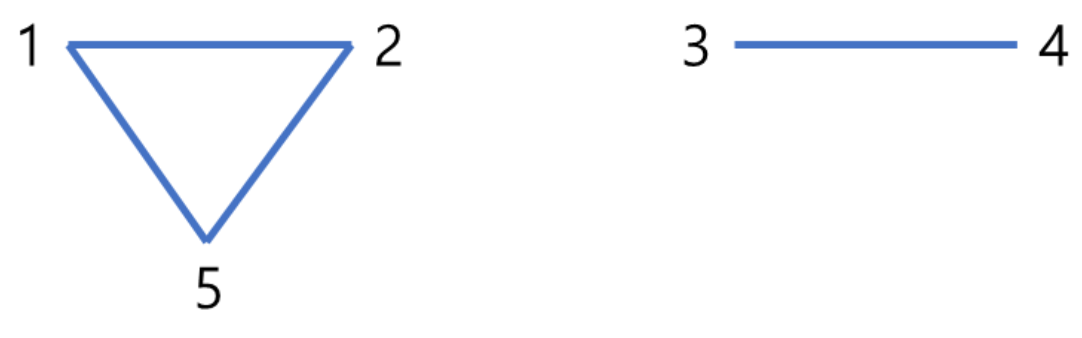

#### 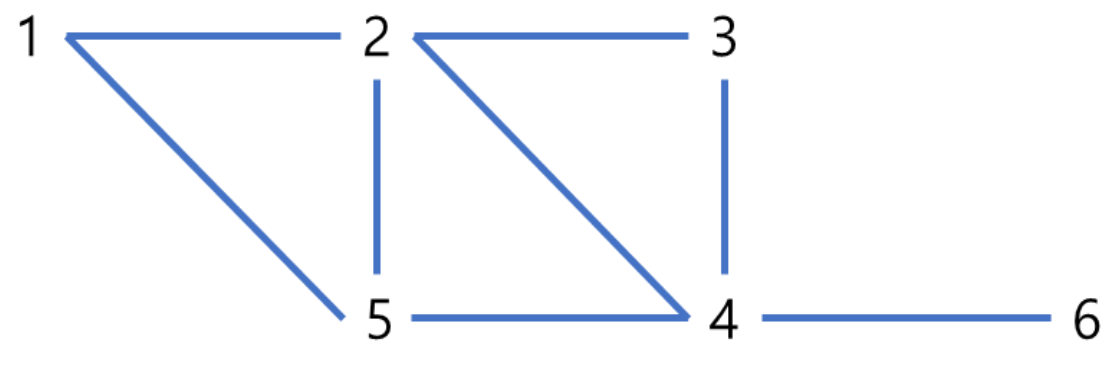

#### dfs/bfs를 수행한 횟수가 연결 요소의 개수 -> dfs/bfs가 끝날 때마다 count += 1 해줌

In [5]:
# dfs 함수
def dfs(graph, v, visited):
    visited[v] = True
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

# 정점의 개수, 간선의 개수
n, m = map(int, input().split()) 

graph = [[] for _ in range(n+1)]
print(graph)

for i in range(m):
    u, v = map(int, input().split())
    graph[u].append(v)
    graph[v].append(u)

count = 0 # 연결 노드의 수

# dfs 그래프의 방문 여부를 담을 리스트
visited = [False] * (n+1)

for i in range(1, n+1):
    if not visited[i]:
        dfs(graph, i, visited)
        count += 1 # dfs 한 번 끝날 때마다 count+1

print(count)

2


In [6]:
# bfs 함수
from collections import deque
def bfs(graph,start,visited):
    queue = deque([start])
    visited[start] = True

    while queue:
        v = queue.popleft()
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

n,m = map(int,input().split())

graph = [[] for _ in range(n+1)]

for i in range(m):
    u, v = map(int, input().split())
    graph[u].append(v)
    graph[v].append(u)

# dfs 그래프의 방문 여부를 담을 리스트
visited = [False] * (n+1)

count = 0
for i in range(1, n+1):
    if not visited[i]:
        bfs(graph, i, visited) # bfs 한 번 끝날 때마다 count+1
        count += 1

print(count)

1


### 과제 3) 음식물 피하기 - 백준 1743

In [7]:
n,m,k = map(int,input().split())

# 그래프 넉넉하게 설정
graph = [[0] * (m+1) for _ in range(n+1)]
print(graph)

for _ in range(k):
    x,y = map(int,input().split())
    graph[x][y] = 1
print(graph)

# size를 전역변수로 선언
global size
size = 0
ans = 0


# dfs 
def dfs(x,y):
    global size

    # 범위 넘으면 종료
    if x<0 or x>n or y<0 or y>m:
        return False
    
    # 쓰레기가(1) 있다면
    if graph[x][y] == 1:
        # 쓰레기 크기 1 증가
        size += 1
        # 방문 처리
        graph[x][y] = 0
        # 상,하,좌,우 살피기
        dfs(x+1,y)
        dfs(x-1,y)
        dfs(x,y+1)
        dfs(x,y-1)

        return True
    return False

for i in range(n+1):
    for j in range(m+1):
        if dfs(i,j) == True:
            # ans(현재까지 중 최대 쓰레기의 크기,정답)에 쓰레기 크기(size) 비교하여 더 큰값을 넣어줌
            ans = max(ans,size)
            # 쓰레기 크기 초기화
            size =0
print(ans)

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]]
4
